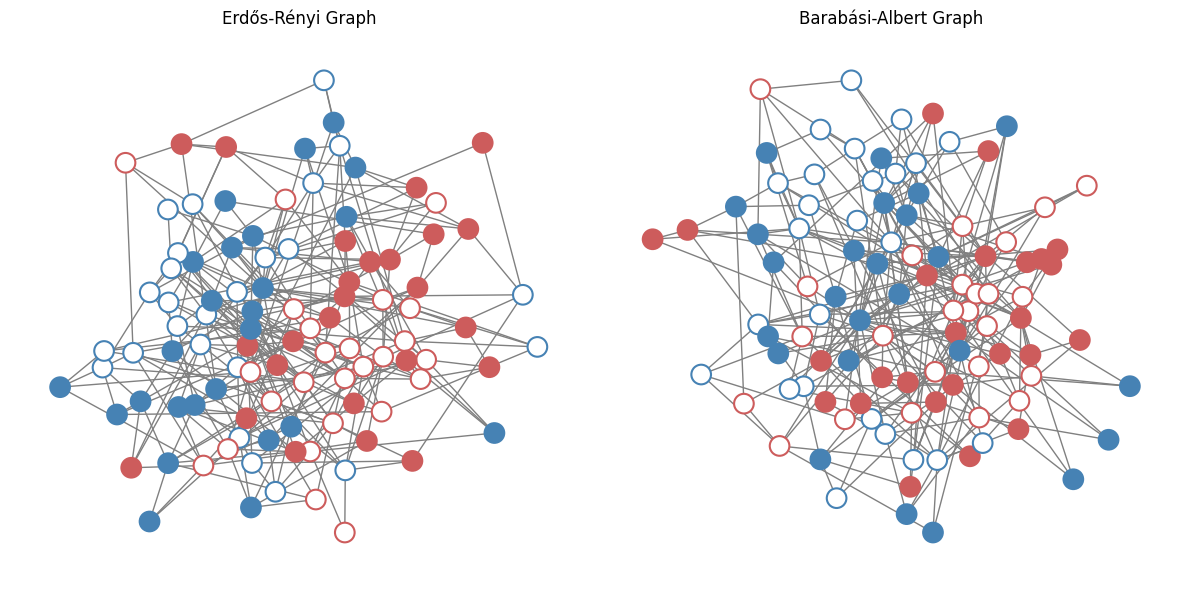

In [12]:
# ---- Graph Generation ----

n = 100
ratios = [1, 1]
opinion_ratios = [0.5, 0.5]

ER, BA = generate_networks(n)
ER_subs = random_subgraphs(ER, ratios)
random_opinions(ER, ER_subs, opinion_ratios)
BA_subs = random_subgraphs(BA, ratios)
random_opinions(BA, BA_subs, opinion_ratios)

# ---- Visualization ----

# Generate subgraph-based color palette
subgraph_colors = generate_colors(len(ER_subs))

# Create node → subgraph index lookup
ER_subgraph_map = {node: i for i, sg in enumerate(ER_subs) for node in sg.nodes()}
BA_subgraph_map = {node: i for i, sg in enumerate(BA_subs) for node in sg.nodes()}

# Create node → opinion value lookup
ER_opinion_map = {node: ER.nodes[node]["opinion"] for node in ER.nodes()}
BA_opinion_map = {node: BA.nodes[node]["opinion"] for node in BA.nodes()}

# Determine fill color (white if opinion=0) and outline color (always by subgraph)
node_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] if ER.nodes[n]["opinion"] == 1 else "white"
    for n in ER.nodes()
]
edge_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] for n in ER.nodes()
]

node_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] if BA.nodes[n]["opinion"] == 1 else "white"
    for n in BA.nodes()
]
edge_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] for n in BA.nodes()
]

# Assign weights based on subgraph agreement
for u, v in ER.edges():
    ER[u][v]["weight"] = 1 if ER_subgraph_map[u] == ER_subgraph_map[v] else 0.1

for u, v in BA.edges():
    BA[u][v]["weight"] = 1 if BA_subgraph_map[u] == BA_subgraph_map[v] else 0.1

# Compute spring layouts directly
pos_ER = nx.spring_layout(ER, weight="weight")
pos_BA = nx.spring_layout(BA, weight="weight")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ER graph
axes[0].set_title("Erdős-Rényi Graph")
nx.draw(
    ER, pos=pos_ER, ax=axes[0], node_size=200, edge_color="gray",
    node_color=node_colors_ER, edgecolors=edge_colors_ER,
    linewidths=1.5, with_labels=False
)

# Plot BA graph
axes[1].set_title("Barabási-Albert Graph")
nx.draw(
    BA, pos=pos_BA, ax=axes[1], node_size=200, edge_color="gray",
    node_color=node_colors_BA, edgecolors=edge_colors_BA,
    linewidths=1.5, with_labels=False
)

plt.tight_layout()
plt.show()


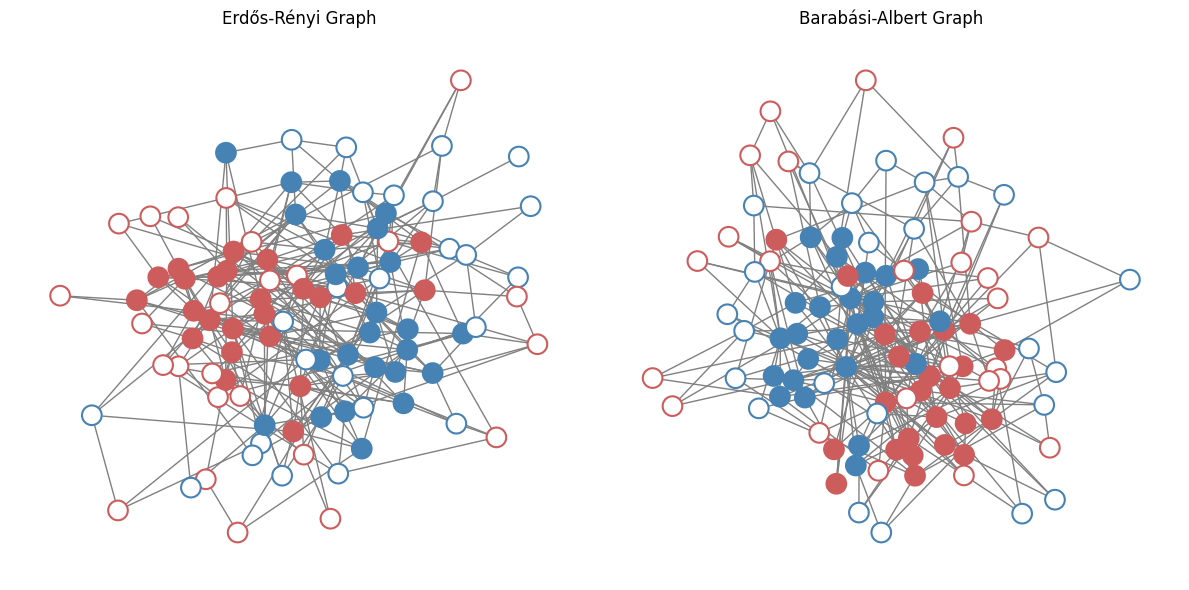

In [13]:
# ---- Graph Generation ----

n = 100
ratios = [1, 1]
elite_opinions = [1, 1]
opinion_ratios = [0.5, 0.5]

ER, BA = generate_networks(n)
ER_subs = random_subgraphs(ER, ratios)
centrality_opinions(ER, ER_subs, elite_opinions, opinion_ratios)
BA_subs = random_subgraphs(BA, ratios)
centrality_opinions(BA, BA_subs, elite_opinions, opinion_ratios)

# ---- Visualization ----

# Generate subgraph-based color palette
subgraph_colors = generate_colors(len(ER_subs))

# Create node → subgraph index lookup
ER_subgraph_map = {node: i for i, sg in enumerate(ER_subs) for node in sg.nodes()}
BA_subgraph_map = {node: i for i, sg in enumerate(BA_subs) for node in sg.nodes()}

# Create node → opinion value lookup
ER_opinion_map = {node: ER.nodes[node]["opinion"] for node in ER.nodes()}
BA_opinion_map = {node: BA.nodes[node]["opinion"] for node in BA.nodes()}

# Determine fill color (white if opinion=0) and outline color (always by subgraph)
node_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] if ER.nodes[n]["opinion"] == 1 else "white"
    for n in ER.nodes()
]
edge_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] for n in ER.nodes()
]

node_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] if BA.nodes[n]["opinion"] == 1 else "white"
    for n in BA.nodes()
]
edge_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] for n in BA.nodes()
]

# Assign weights based on subgraph agreement
for u, v in ER.edges():
    ER[u][v]["weight"] = 1 if ER_subgraph_map[u] == ER_subgraph_map[v] else 0.1

for u, v in BA.edges():
    BA[u][v]["weight"] = 1 if BA_subgraph_map[u] == BA_subgraph_map[v] else 0.1

# Compute spring layouts directly
pos_ER = nx.spring_layout(ER, weight="weight")
pos_BA = nx.spring_layout(BA, weight="weight")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ER graph
axes[0].set_title("Erdős-Rényi Graph")
nx.draw(
    ER, pos=pos_ER, ax=axes[0], node_size=200, edge_color="gray",
    node_color=node_colors_ER, edgecolors=edge_colors_ER,
    linewidths=1.5, with_labels=False
)

# Plot BA graph
axes[1].set_title("Barabási-Albert Graph")
nx.draw(
    BA, pos=pos_BA, ax=axes[1], node_size=200, edge_color="gray",
    node_color=node_colors_BA, edgecolors=edge_colors_BA,
    linewidths=1.5, with_labels=False
)

plt.tight_layout()
plt.show()
